# XGBoost Optuna Tuner Win Percentage Model

Binary Classification model to predict whether or not the away team will beat the home team in the next NLF game

### Config


In [1]:
cd ../../..

c:\Users\charl\Desktop\Git\nfl-model-store


c:\Users\charl\Desktop\Git\nfl-model-store\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from src.data_registry import DataRegistry
from src.utils import get_dataframe
from src.modeling.utils import plot_correlation, train_test_splitter, get_best_run, register_model,load_registered_model
from datetime import datetime
from sklearn.metrics import accuracy_score
from src.modeling.tuning.xgboost_optuna_tuner import XgboostOptunaTuner
import pandas as pd
import os
import json

import mlflow

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


START_SEASON = 2002
RUN_SEASON = 2023
RUN_WEEK = None

FEATURE_STORE_GROUP = "event"
FEATURE_STORE_NAME = "regular_season_game"
EXPERIMENT_NAME = "win_percentage"
RUN_NAME = "xgboost_optuna_tuner"
METRIC = 'accuracy'
PRIMARY_METRIC_THRESHOLD = 0.65


DATA_COLUMNS = [
    'away_team_win',
    #'season', 
    #'week', 
    #'home_team', 
    #'away_team', 
    #'home_score', 
    #'away_score',
    'spread_line', 
    #'total_line', 
    #'away_team_spread',
    #'total_target', 
    #'away_team_covered', 
    #'home_team_covered',
    #'under_covered', 
    #'away_team_covered_spread',
    'away_ewma_rushing_offense',
    'away_ewma_rushing_defense',
    'away_ewma_passing_offense',
    'away_ewma_passing_defense',
    'away_ewma_score_offense',
    'away_ewma_score_defense',
    'home_ewma_rushing_offense',
    'home_ewma_rushing_defense',
    'home_ewma_passing_offense',
    'home_ewma_passing_defense',
    'home_ewma_score_offense',
    'home_ewma_score_defense',
    #'away_rolling_spread_cover',
    #'away_rolling_under_cover',
    #'home_rolling_spread_cover', 
    #'home_rolling_under_cover',
    'away_elo_pre', 
    #'away_elo_prob', 
    'home_elo_pre', 
    #'home_elo_prob'
]

extra = [
    'avg_points_offense',
    'avg_points_defense',
    'avg_point_differential_offense',
    'avg_point_differential_defense',
    'avg_fantasy_points_ppr_offense',
    'avg_fantasy_points_ppr_defense',
    'avg_total_yards_offense',
    'avg_total_yards_defense',
    'avg_total_turnovers_offense',
    'avg_total_turnovers_defense',
    'avg_total_touchdowns_offense',
    'avg_total_touchdowns_defense',
    'avg_yards_per_play_offense',
    'avg_yards_per_play_defense',
    'avg_qbr_offense',
    'avg_qbr_defense',
    'avg_yards_per_pass_attempt_offense',
    'avg_yards_per_pass_attempt_defense',
    'avg_third_down_percentage_offense',
    'avg_third_down_percentage_defense',
]
h_extra = ['home_' + i for i in extra]
a_extra = ['away_' + i for i in extra]
DATA_COLUMNS = DATA_COLUMNS + h_extra + a_extra

from src.data_registry import DataRegistry


data_registry = DataRegistry(feature_store_group=FEATURE_STORE_GROUP, feature_store_name=FEATURE_STORE_NAME)
df = data_registry.make_dataset(start_season=START_SEASON, end_season=RUN_SEASON)

c:\Users\charl\Desktop\Git\nfl-model-store\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


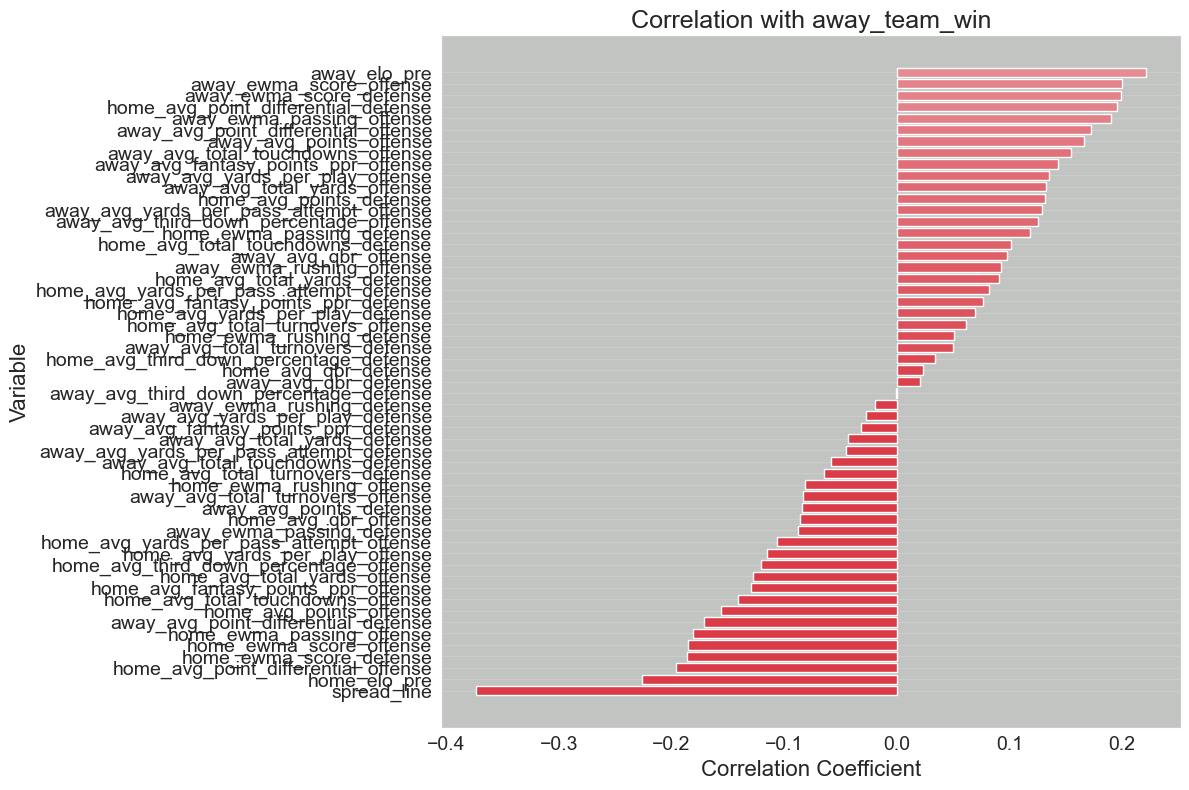

In [3]:
corr_fig = plot_correlation(df[DATA_COLUMNS], DATA_COLUMNS)
corr_fig

### 3. Data Preparation

Data has already been prepared in the [feature store](https://github.com/theedgepredictor/nfl-feature-store)

We will use a train / test split of 2000-2022 seasons and 2023



### 4. Model Building



In [4]:
from src.modeling.training.trainer import mlflow_trainer
mlflow_trainer(
    df=df,
    data_columns=DATA_COLUMNS,
    experiment_name=EXPERIMENT_NAME,
    run_name=RUN_NAME,
    metric=METRIC,
    metric_threshold=PRIMARY_METRIC_THRESHOLD,
    run_season=RUN_SEASON,
    run_week=RUN_WEEK,
    feature_store_group=FEATURE_STORE_GROUP,
    feature_store_name=FEATURE_STORE_NAME,
    model_class='XGBoostClassifier',
    start_season=START_SEASON,
    n_trials=75
)

Best run to beat: d86d1a8ab8204c4ab03659fa2a8a90a2 with accuracy = 0.6801470588235294
MLFlow Run:
    experiment_id: 489090576060070207
    run_id: d666eed1559049cc9372ab3177e3a2ff
    experiment_name: win_percentage
    run_name: xgboost_optuna_tuner


[I 2024-09-19 09:33:23,573] A new study created in memory with name: no-name-7d04ec5e-d4b2-4735-b1e9-53303842fc4f
  0%|          | 0/75 [00:00<?, ?it/s]

[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01595
[0]	train-error:0.43517+0.00290	test-error:0.43517+0.01161
[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01595
[0]	train-error:0.43517+0.00290	test-error:0.43517+0.01161
[0]	train-error:0.43517+0.00290	test-error:0.43517+0.01161
[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01595
[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01595
[0]	train-error:0.41815+0.00680	test-error:0.42385+0.01711
[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01595
[50]	train-error:0.43517+0.00399	test-error:0.43517+0.01595


Best trial: 1. Best value: 0.43517:   1%|▏         | 1/75 [00:08<10:30,  8.52s/it]

[I 2024-09-19 09:33:32,089] Trial 1 finished with value: 0.43516964962748095 and parameters: {'booster': 'gbtree', 'lambda': 0.01173579354471025, 'alpha': 5.560159868281627e-06, 'subsample': 0.45761864649472833, 'colsample_bytree': 0.763803423925113, 'max_depth': 3, 'min_child_weight': 3, 'eta': 3.307471867559706e-06, 'gamma': 0.004786100086437121, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.43516964962748095.
[0]	train-error:0.43517+0.00399	test-error:0.43517+0.01594
[50]	train-error:0.43517+0.00290	test-error:0.43517+0.01161


Best trial: 6. Best value: 0.435169:   3%|▎         | 2/75 [00:10<05:41,  4.68s/it]

[I 2024-09-19 09:33:34,081] Trial 6 finished with value: 0.435168961847103 and parameters: {'booster': 'gbtree', 'lambda': 0.0037320020348741933, 'alpha': 6.563238390843456e-07, 'subsample': 0.7853338206149798, 'colsample_bytree': 0.3470153014589298, 'max_depth': 5, 'min_child_weight': 7, 'eta': 1.7666281385483782e-08, 'gamma': 2.401749484542474e-07, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.435168961847103.
[50]	train-error:0.43517+0.00290	test-error:0.43517+0.01161


Best trial: 6. Best value: 0.435169:   4%|▍         | 3/75 [00:13<04:51,  4.04s/it]

[I 2024-09-19 09:33:37,364] Trial 0 finished with value: 0.435168961847103 and parameters: {'booster': 'gbtree', 'lambda': 2.2344199125115456e-06, 'alpha': 0.007184409536751171, 'subsample': 0.4168918602804663, 'colsample_bytree': 0.5076847384793829, 'max_depth': 12, 'min_child_weight': 10, 'eta': 3.593442850228587e-06, 'gamma': 0.0003705434823546364, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.435168961847103.


### 5. Model Evaluation



### 6. Model Deployment

Weekly or daily runs of registered models 

Predictions will be saved under ```./data/predictions/{experiment_name}/{run_name}/{run_season}.parquet```

Models will be re-fit for each run to make sure the latest data is used. If accuracy has dropped over the last couple weeks we can trigger a retrain against the registered model to try to gain more accuracy.

In [4]:
## Configure and setup an inference pipeline in the experiment folder of the project

from src.experiments.win_percentage.win_percentage import win_percentage_xgb_optuna_tuner_inference_pipeline
win_percentage_xgb_optuna_tuner_inference_pipeline()

Loading registered model: win_percentage/xgboost_optuna_tuner
No predictions found for season 2022.
Loaded Predictions from 2022 - 0...
Generating Predictions for 2022 - 1...
Generating Predictions for 2022 - 2...
Generating Predictions for 2022 - 3...
Generating Predictions for 2022 - 4...
Generating Predictions for 2022 - 5...
Generating Predictions for 2022 - 6...
Generating Predictions for 2022 - 7...
Generating Predictions for 2022 - 8...
Generating Predictions for 2022 - 9...
Generating Predictions for 2022 - 10...
Generating Predictions for 2022 - 11...
Generating Predictions for 2022 - 12...
Generating Predictions for 2022 - 13...
Generating Predictions for 2022 - 14...
Generating Predictions for 2022 - 15...
Generating Predictions for 2022 - 16...
Generating Predictions for 2022 - 17...
Generating Predictions for 2022 - 18...
Saved predictions for season 2022 to ./data/predictions/win_percentage/xgboost_optuna_tuner/2022.parquet
No predictions found for season 2023.
Loaded Pre

In [9]:
from src.modeling.utils import get_predictions
fs_season_predictions_df = get_predictions(experiment_name=EXPERIMENT_NAME, run_name=RUN_NAME, season=2024)
pred_vals = fs_season_predictions_df.prediction > 0.5
true_vals = fs_season_predictions_df.away_team_win
fs_season_predictions_df = fs_season_predictions_df[fs_season_predictions_df.week < 3]
print("Season Accuracy: ", accuracy_score(true_vals, pred_vals))

fs_season_predictions_df = fs_season_predictions_df.rename(columns={'prediction': f"{EXPERIMENT_NAME}_{RUN_NAME}_prediction"})

fs_season_predictions_df

Season Accuracy:  0.609375


,home_team,away_team,season,week,away_team_win,win_percentage_xgboost_optuna_tuner_prediction,model_uuid,updated_at
5663,KC,BAL,2024,1,0,0.287543,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5664,PHI,GB,2024,1,0,0.518079,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5665,ATL,PIT,2024,1,1,0.423998,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5666,BUF,ARI,2024,1,0,0.342114,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5667,CHI,TEN,2024,1,0,0.282324,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5668,CIN,NE,2024,1,1,0.229858,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5669,IND,HOU,2024,1,1,0.595742,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5670,MIA,JAX,2024,1,0,0.484149,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5671,NO,CAR,2024,1,0,0.278443,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753
5672,NYG,MIN,2024,1,1,0.554073,d86d1a8ab8204c4ab03659fa2a8a90a2,2024-09-19 09:34:39.346753


In [42]:
def make_report(df, season, mode='inference'):
    upcoming_models = [
        {'experiment_name':'team_point', 'run_name':'baseline'},
        {'experiment_name':'team_point', 'run_name':'xgboost_optuna_tuner'},
    ]
    active_models = [
        {'experiment_name':'win_percentage', 'run_name':'baseline'},
        {'experiment_name':'win_percentage', 'run_name':'xgboost_optuna_tuner'},
    ]
    targets = [
        'home_score',
        'away_score',
        'away_team_win',
        'away_team_spread',
        'total_target',
        'away_team_covered',
        'home_team_covered',
        'under_covered',
        'away_team_covered_spread',   
    ]
    report_df = df[[
        'season',
        'week',
        'away_team',
        'away_elo_pre',
        'home_team',
        'home_elo_pre',
        'spread_line',
        'total_line',
        'away_elo_prob',
        'home_elo_prob',
    ]+targets].copy().rename(columns={
        'away_elo_pre': 'away_rating',
        'home_elo_pre': 'home_rating',
        'away_elo_prob': 'away_wp_elo',
        'home_elo_prob': 'home_wp_elo',
    })

    report_df['away_wp_vegas'] = report_df['spread_line'].apply(lambda x: 1 if x < 0 else 0)
    report_df[f"wp_elo_error_rate"] = (report_df[f"away_wp_elo"] - report_df.away_team_win).abs()
    report_df[f"wp_elo_result"] = ((report_df[f"away_wp_elo"] > 0.5) == report_df.away_team_win).astype(int)
    report_df[f"wp_vegas_result"] = ((report_df[f"away_wp_vegas"] > 0.5) == report_df.away_team_win).astype(int)

    for active_model in active_models:
        experiment_name = active_model['experiment_name']
        run_name = active_model['run_name']
        print(f"Adding {experiment_name} {run_name} to the inference report...")
        fs_season_predictions_df = get_predictions(experiment_name=experiment_name, run_name=run_name, season=season)
        if experiment_name == 'win_percentage':
            fs_season_predictions_df[f"away_wp_{run_name}"] = fs_season_predictions_df.prediction
            fs_season_predictions_df[f"home_wp_{run_name}"] = 1 - fs_season_predictions_df.prediction
            fs_season_predictions_df[f"wp_{run_name}_error_rate"] = (fs_season_predictions_df[f"away_wp_{run_name}"] - fs_season_predictions_df.away_team_win).abs()
            fs_season_predictions_df[f"wp_{run_name}_result"] = (((fs_season_predictions_df[f"away_wp_{run_name}"] > 0.5) == fs_season_predictions_df.away_team_win)).astype(int)

            report_df = pd.merge(report_df, fs_season_predictions_df[['season', 'week', 'away_team','home_team', f"away_wp_{run_name}", f"home_wp_{run_name}", f"wp_{run_name}_error_rate", f"wp_{run_name}_result"]], on=['season', 'week', 'away_team', 'home_team'], how='left')
        elif experiment_name == 'team_point':
            pass # TODO 
            # Team point should be broken down into spread (home_pred_score - away_pred_score) and total (home_pred_score + away_pred_score)

        elif experiment_name == 'spread':
            pass # TODO
        else:
            pass # TODO
    report_df['updated_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if mode == 'inference':
        report_df = report_df.drop(columns=targets + [col for col in report_df.columns if '_error_rate' in col or '_result' in col])
    elif mode == 'evaluation':
        pass
        # TODO Create an evaluation report where instead of having the predictions as columns we have the result for each system
        # (Error rate for win_percentage, team_point, spread and total)
        # (1 for spread and total if the model correctly covered the spread_line or total_line and 0 otherwise)
        # (1 for win_percentage if the model correctly predicted the win_percentage and 0 otherwise)

                

    else:
        raise Exception("Invalid report mode: ", mode)
    return report_df


report_df = make_report(df[df.season==2023].copy(), 2023, mode='evaluation')
report_df

Adding win_percentage baseline to the inference report...
Adding win_percentage xgboost_optuna_tuner to the inference report...


,season,week,away_team,away_rating,home_team,home_rating,spread_line,total_line,away_wp_elo,home_wp_elo,home_score,away_score,away_team_win,away_team_spread,total_target,away_team_covered,home_team_covered,under_covered,away_team_covered_spread,away_wp_vegas,wp_elo_error_rate,wp_elo_result,wp_vegas_result,away_wp_baseline,home_wp_baseline,wp_baseline_error_rate,wp_baseline_result,away_wp_xgboost_optuna_tuner,home_wp_xgboost_optuna_tuner,wp_xgboost_optuna_tuner_error_rate,wp_xgboost_optuna_tuner_result,updated_at
0,2023,1,DET,1486.873686,KC,1755.805268,4.0,53.0,0.270929,0.729071,20.0,21.0,1,-1.0,41.0,1,0,1,1,0,0.729071,0,0,0.390,0.610,0.61,0,0.429340,0.570660,0.57066,0,2024-09-19 11:00:16
1,2023,1,CAR,1453.448635,ATL,1436.836227,3.5,40.5,0.458085,0.541915,24.0,10.0,0,14.0,34.0,0,1,1,0,0,0.458085,1,1,0.294,0.706,0.294,1,0.348667,0.651333,0.348667,1,2024-09-19 11:00:16
2,2023,1,HOU,1306.752814,BAL,1538.389165,9.5,43.5,0.292645,0.707355,25.0,9.0,0,16.0,34.0,0,1,1,0,0,0.292645,1,1,0.396,0.604,0.396,1,0.219407,0.780593,0.219407,1,2024-09-19 11:00:16
3,2023,1,CIN,1698.649026,CLE,1489.267137,-1.0,46.5,0.595508,0.404492,24.0,3.0,0,21.0,27.0,0,1,1,0,1,0.595508,0,0,0.576,0.424,0.576,0,0.544223,0.455777,0.544223,0,2024-09-19 11:00:16
4,2023,1,JAX,1485.032903,IND,1387.618602,-4.0,45.5,0.516123,0.483877,21.0,31.0,1,-10.0,52.0,1,0,0,1,1,0.483877,1,1,0.600,0.400,0.4,1,0.563517,0.436483,0.436483,1,2024-09-19 11:00:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023,18,DEN,1458.732616,LV,1459.30596,3.5,37.5,0.445834,0.554166,27.0,14.0,0,13.0,41.0,0,1,0,0,0,0.445834,1,1,0.352,0.648,0.352,1,0.401172,0.598828,0.401172,1,2024-09-19 11:00:16
268,2023,18,PHI,1658.776335,NYG,1339.533538,-4.5,43.0,0.66885,0.33115,27.0,10.0,0,17.0,37.0,0,1,1,0,1,0.66885,0,0,0.684,0.316,0.684,0,0.748044,0.251956,0.748044,0,2024-09-19 11:00:16
269,2023,18,LA,1526.387547,SF,1824.630975,5.5,40.0,0.25459,0.74541,20.0,21.0,1,-1.0,41.0,1,0,0,1,0,0.74541,0,0,0.294,0.706,0.706,0,0.388960,0.611040,0.61104,0,2024-09-19 11:00:16
270,2023,18,DAL,1712.960111,WAS,1269.587517,-13.0,47.5,0.742741,0.257259,10.0,38.0,1,-28.0,48.0,1,0,0,1,1,0.257259,1,1,0.828,0.172,0.172,1,0.789424,0.210576,0.210576,1,2024-09-19 11:00:16


In [43]:
for col in [col for col in report_df.columns if '_result' in col]:
    print(f"{col} = {round(report_df[col].sum() / report_df.shape[0], 4) * 100}%")

wp_elo_result = 60.660000000000004%
wp_vegas_result = 68.01%
wp_baseline_result = 65.07%
wp_xgboost_optuna_tuner_result = 65.07%


In [44]:
data_registry = DataRegistry(feature_store_group=FEATURE_STORE_GROUP, feature_store_name=FEATURE_STORE_NAME)
df = data_registry.make_dataset(start_season=2022, end_season=2024)
df

,season,week,home_team,away_team,home_score,away_score,spread_line,total_line,away_team_win,away_team_spread,total_target,away_team_covered,home_team_covered,under_covered,away_team_covered_spread,home_ewma_score_offense,home_ewma_score_defense,home_avg_fantasy_points_offense,home_avg_fantasy_points_defense,home_avg_fantasy_points_half_ppr_offense,home_avg_fantasy_points_half_ppr_defense,home_avg_fantasy_points_ppr_offense,home_avg_fantasy_points_ppr_defense,home_avg_total_plays_offense,home_avg_total_plays_defense,home_avg_total_yards_offense,home_avg_total_yards_defense,home_avg_total_fumbles_offense,home_avg_total_fumbles_defense,home_avg_total_fumbles_lost_offense,home_avg_total_fumbles_lost_defense,home_avg_total_turnovers_offense,home_avg_total_turnovers_defense,home_avg_total_touchdowns_offense,home_avg_total_touchdowns_defense,home_avg_total_first_downs_offense,home_avg_total_first_downs_defense,home_avg_touchdown_per_play_offense,home_avg_touchdown_per_play_defense,home_avg_yards_per_play_offense,home_avg_yards_per_play_defense,home_avg_fantasy_point_per_play_offense,home_avg_fantasy_point_per_play_defense,home_avg_completions_offense,home_avg_completions_defense,home_avg_attempts_offense,home_avg_attempts_defense,home_avg_passing_yards_offense,home_avg_passing_yards_defense,home_avg_passing_tds_offense,home_avg_passing_tds_defense,home_avg_interceptions_offense,home_avg_interceptions_defense,home_avg_sacks_offense,home_avg_sacks_defense,home_avg_sack_yards_offense,home_avg_sack_yards_defense,home_avg_sack_fumbles_lost_offense,home_avg_sack_fumbles_lost_defense,home_avg_passing_air_yards_offense,home_avg_passing_air_yards_defense,home_avg_passing_yards_after_catch_offense,home_avg_passing_yards_after_catch_defense,home_avg_passing_first_downs_offense,home_avg_passing_first_downs_defense,home_avg_passing_epa_offense,home_avg_passing_epa_defense,home_avg_pacr_offense,home_avg_pacr_defense,home_avg_dakota_offense,home_avg_dakota_defense,home_avg_time_to_throw_offense,home_avg_time_to_throw_defense,home_avg_completed_air_yards_offense,home_avg_completed_air_yards_defense,home_avg_intended_air_yards_passing_offense,home_avg_intended_air_yards_passing_defense,home_avg_air_yards_differential_offense,home_avg_air_yards_differential_defense,home_avg_aggressiveness_offense,home_avg_aggressiveness_defense,home_avg_max_completed_air_distance_offense,home_avg_max_completed_air_distance_defense,home_avg_air_yards_to_sticks_offense,home_avg_air_yards_to_sticks_defense,home_avg_passer_rating_offense,home_avg_passer_rating_defense,home_avg_completion_percentage_offense,home_avg_completion_percentage_defense,home_avg_expected_completion_percentage_offense,home_avg_expected_completion_percentage_defense,home_avg_completion_percentage_above_expectation_offense,home_avg_completion_percentage_above_expectation_defense,home_avg_air_distance_offense,home_avg_air_distance_defense,home_avg_max_air_distance_offense,home_avg_max_air_distance_defense,home_avg_qbr_offense,home_avg_qbr_defense,home_avg_air_yards_per_pass_attempt_offense,...,away_avg_qbr_offense,away_avg_qbr_defense,away_avg_air_yards_per_pass_attempt_offense,away_avg_air_yards_per_pass_attempt_defense,away_avg_pass_to_rush_ratio_offense,away_avg_pass_to_rush_ratio_defense,away_avg_pass_to_rush_first_down_ratio_offense,away_avg_pass_to_rush_first_down_ratio_defense,away_avg_yards_per_pass_attempt_offense,away_avg_yards_per_pass_attempt_defense,away_avg_sack_rate_offense,away_avg_sack_rate_defense,away_avg_carries_offense,away_avg_carries_defense,away_avg_rushing_yards_offense,away_avg_rushing_yards_defense,away_avg_rushing_tds_offense,away_avg_rushing_tds_defense,away_avg_rushing_fumbles_lost_offense,away_avg_rushing_fumbles_lost_defense,away_avg_rushing_first_downs_offense,away_avg_rushing_first_downs_defense,away_avg_rushing_epa_offense,away_avg_rushing_epa_defense,away_avg_efficiency_offense,away_avg_efficiency_defense,away_avg_percent_attempts_gte_eight_defenders_offense,away_av

In [53]:
def get_elo(season):
    try:
        df = pd.read_parquet(f'https://github.com/theedgepredictor/elo-rating/raw/main/data/events/football/nfl/{season}.parquet')
        return df
    except:
        return pd.DataFrame()


df = get_elo(2024)
df.sort_values(by=['date'])

,id,str_event_id,season,is_postseason,tournament_id,is_finished,neutral_site,date,datetime,home_team_id,home_team_name,home_team_score,away_team_id,away_team_name,away_team_score
0,401671805,20240907_eagles_packers,2024,0,<NA>,1,1,2024-09-07,2024-09-07 00:15:00+00:00,21,eagles,34,9,packers,29
12,401671770,20240908_buccaneers_commanders,2024,0,<NA>,1,0,2024-09-08,2024-09-08 20:25:00+00:00,27,buccaneers,37,28,commanders,20
11,401671761,20240908_browns_cowboys,2024,0,<NA>,1,0,2024-09-08,2024-09-08 20:25:00+00:00,5,browns,17,6,cowboys,33
9,401671664,20240908_seahawks_broncos,2024,0,<NA>,1,0,2024-09-08,2024-09-08 20:05:00+00:00,26,seahawks,26,7,broncos,20
8,401671712,20240908_giants_vikings,2024,0,<NA>,1,0,2024-09-08,2024-09-08 17:00:00+00:00,19,giants,6,16,vikings,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,401671840,20250105_cowboys_commanders,2024,0,<NA>,0,0,2025-01-05,2025-01-05 05:00:00+00:00,6,cowboys,<NA>,28,commanders,<NA>
253,401671827,20250105_falcons_panthers,2024,0,<NA>,0,0,2025-01-05,2025-01-05 05:00:00+00:00,1,falcons,<NA>,29,panthers,<NA>
267,401671828,20250105_buccaneers_saints,2024,0,<NA>,0,0,2025-01-05,2025-01-05 05:00:00+00:00,27,buccaneers,<NA>,18,saints,<NA>
259,401671837,20250105_colts_jaguars,2024,0,<NA>,0,0,2025-01-05,2025-01-05 05:00:00+00:00,11,colts,<NA>,30,jaguars,<NA>


In [46]:
targets = [
    'home_score',
    'away_score',
    'away_team_win',
    'away_team_spread',
    'total_target',
    'away_team_covered',
    'home_team_covered',
    'under_covered',
    'away_team_covered_spread',
]
report_df = df[df.season==2024][[
                    'season',
                    'week',
                    'away_team',
                    'away_elo_pre',
                    'home_team',
                    'home_elo_pre',
                    'spread_line',
                    'total_line',
                    'away_elo_prob',
                    'home_elo_prob',
                ] + targets].copy().rename(columns={
    'away_elo_pre': 'away_rating',
    'home_elo_pre': 'home_rating',
    'away_elo_prob': 'away_wp_elo',
    'home_elo_prob': 'home_wp_elo',
})

report_df

,season,week,away_team,away_rating,home_team,home_rating,spread_line,total_line,away_wp_elo,home_wp_elo,home_score,away_score,away_team_win,away_team_spread,total_target,away_team_covered,home_team_covered,under_covered,away_team_covered_spread
543,2024,1,BAL,<NA>,KC,<NA>,3.0,46.0,<NA>,<NA>,27.0,20.0,0,7.0,47.0,0,1,0,0
544,2024,1,GB,1579.881723,PHI,1544.887369,2.0,49.5,0.525159,0.474841,34.0,29.0,0,5.0,63.0,0,1,0,0
545,2024,1,PIT,1536.797127,ATL,1406.881419,4.0,43.0,0.539433,0.460567,10.0,18.0,1,-8.0,28.0,1,0,1,1
546,2024,1,ARI,1377.288327,BUF,1679.473922,6.5,46.0,0.252443,0.747557,34.0,28.0,0,6.0,62.0,1,0,0,1
547,2024,1,TEN,1413.184182,CHI,1439.27718,4.0,43.0,0.427767,0.572233,24.0,17.0,0,7.0,41.0,0,1,1,0
548,2024,1,NE,1377.842615,CIN,1581.027399,8.0,40.5,0.30988,0.69012,10.0,16.0,1,-6.0,26.0,1,0,1,1
549,2024,1,HOU,1484.500775,IND,1449.206736,-3.0,49.0,0.47146,0.52854,27.0,29.0,1,-2.0,56.0,0,1,0,0
550,2024,1,JAX,1486.097805,MIA,1557.224393,3.5,49.5,0.396377,0.603623,20.0,17.0,0,3.0,37.0,1,0,1,1
551,2024,1,CAR,1288.789047,NO,1527.43126,3.5,41.5,0.288489,0.711511,47.0,10.0,0,37.0,57.0,0,1,0,0
552,2024,1,MIN,1486.813252,NYG,1430.933246,-1.0,42.5,0.486246,0.513754,6.0,28.0,1,-22.0,34.0,1,0,1,1


In [ ]:
def make_report(df, season, mode='inference'):
    upcoming_models = [
        {'experiment_name': 'team_point', 'run_name': 'baseline'},
        {'experiment_name': 'team_point', 'run_name': 'xgboost_optuna_tuner'},
    ]
    active_models = [
        {'experiment_name': 'win_percentage', 'run_name': 'baseline'},
        {'experiment_name': 'win_percentage', 'run_name': 'xgboost_optuna_tuner'},
    ]
    targets = [
        'home_score',
        'away_score',
        'away_team_win',
        'away_team_spread',
        'total_target',
        'away_team_covered',
        'home_team_covered',
        'under_covered',
        'away_team_covered_spread',
    ]
    report_df = df[[
                       'season',
                       'week',
                       'away_team',
                       'away_elo_pre',
                       'home_team',
                       'home_elo_pre',
                       'spread_line',
                       'total_line',
                       'away_elo_prob',
                       'home_elo_prob',
                   ] + targets].copy().rename(columns={
        'away_elo_pre': 'away_rating',
        'home_elo_pre': 'home_rating',
        'away_elo_prob': 'away_wp_elo',
        'home_elo_prob': 'home_wp_elo',
    })

    report_df['away_wp_vegas'] = report_df['spread_line'].apply(lambda x: 1 if x < 0 else 0)
    report_df[f"wp_elo_error_rate"] = (report_df[f"away_wp_elo"] - report_df.away_team_win).abs()
    report_df[f"wp_elo_result"] = ((report_df[f"away_wp_elo"] > 0.5) == report_df.away_team_win).astype(int)
    report_df[f"wp_vegas_result"] = ((report_df[f"away_wp_vegas"] > 0.5) == report_df.away_team_win).astype(int)

    for active_model in active_models:
        experiment_name = active_model['experiment_name']
        run_name = active_model['run_name']
        print(f"Adding {experiment_name} {run_name} to the inference report...")
        fs_season_predictions_df = get_predictions(experiment_name=experiment_name, run_name=run_name, season=season)
        if experiment_name == 'win_percentage':
            fs_season_predictions_df[f"away_wp_{run_name}"] = fs_season_predictions_df.prediction
            fs_season_predictions_df[f"home_wp_{run_name}"] = 1 - fs_season_predictions_df.prediction
            fs_season_predictions_df[f"wp_{run_name}_error_rate"] = (fs_season_predictions_df[f"away_wp_{run_name}"] - fs_season_predictions_df.away_team_win).abs()
            fs_season_predictions_df[f"wp_{run_name}_result"] = (((fs_season_predictions_df[f"away_wp_{run_name}"] > 0.5) == fs_season_predictions_df.away_team_win)).astype(int)

            report_df = pd.merge(report_df, fs_season_predictions_df[['season', 'week', 'away_team', 'home_team', f"away_wp_{run_name}", f"home_wp_{run_name}", f"wp_{run_name}_error_rate", f"wp_{run_name}_result"]], on=['season', 'week', 'away_team', 'home_team'], how='left')
        elif experiment_name == 'team_point':
            pass  # TODO
            # Team point should be broken down into spread (home_pred_score - away_pred_score) and total (home_pred_score + away_pred_score)

        elif experiment_name == 'spread':
            pass  # TODO
        else:
            pass  # TODO
    report_df['updated_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if mode == 'inference':
        report_df = report_df.drop(columns=targets + [col for col in report_df.columns if '_error_rate' in col or '_result' in col])
    elif mode == 'evaluation':
        pass
        # TODO Create an evaluation report where instead of having the predictions as columns we have the result for each system
        # (Error rate for win_percentage, team_point, spread and total)
        # (1 for spread and total if the model correctly covered the spread_line or total_line and 0 otherwise)
        # (1 for win_percentage if the model correctly predicted the win_percentage and 0 otherwise)

    else:
        raise Exception("Invalid report mode: ", mode)
    return report_df